In [1]:
### Import all the libraries 

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
df = pd.read_csv('weather.csv')
df

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes
5,rainy,cool,normal,False,yes
6,rainy,cool,normal,True,no
7,rainy,mild,normal,False,yes
8,rainy,mild,high,True,no
9,sunny,hot,high,False,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [4]:
df['play'].value_counts().to_dict()

{'yes': 9, 'no': 5}

In [5]:
df['play'].replace({'yes': 1, 'no': 0},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 590.0+ bytes


In [13]:
df['outlook'].value_counts().to_dict()

{'rainy': 5, 'sunny': 5, 'overcast': 4}

In [14]:
df['outlook'].replace({'rainy': 1, 'sunny': 2, 'overcast': 3},inplace=True)

In [15]:
df['temperature'].value_counts().to_dict()

{'mild': 6, 'hot': 4, 'cool': 4}

In [16]:
df['temperature'].replace({'mild': 2, 'hot': 3, 'cool': 1},inplace=True)

In [17]:
df['humidity'].value_counts().to_dict()

{'high': 7, 'normal': 7}

In [18]:
df['humidity'].replace({'high': 2, 'normal': 1},inplace=True)

In [19]:
df['windy'].value_counts().to_dict()

{False: 8, True: 6}

In [20]:
df['windy'].replace({False: 0, True: 1},inplace=True)

In [21]:
x = df.drop('play',axis=1)
y = df['play']

In [22]:
x

,outlook,temperature,humidity,windy
0,3,3,2,0
1,3,1,1,1
2,3,2,2,1
3,3,3,1,0
4,1,2,2,0
5,1,1,1,0
6,1,1,1,1
7,1,2,1,0
8,1,2,2,1
9,2,3,2,0


In [23]:
y

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    1
13    1
Name: play, dtype: int64

In [24]:
dt_model = DecisionTreeClassifier()
dt_model

DecisionTreeClassifier()

In [25]:
dt_model.fit(x,y)

DecisionTreeClassifier()

In [26]:
y_pred = dt_model.predict(x)

accuracy_score(y,y_pred)

1.0

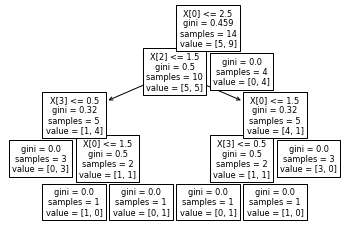

In [27]:
tree = plot_tree(dt_model)

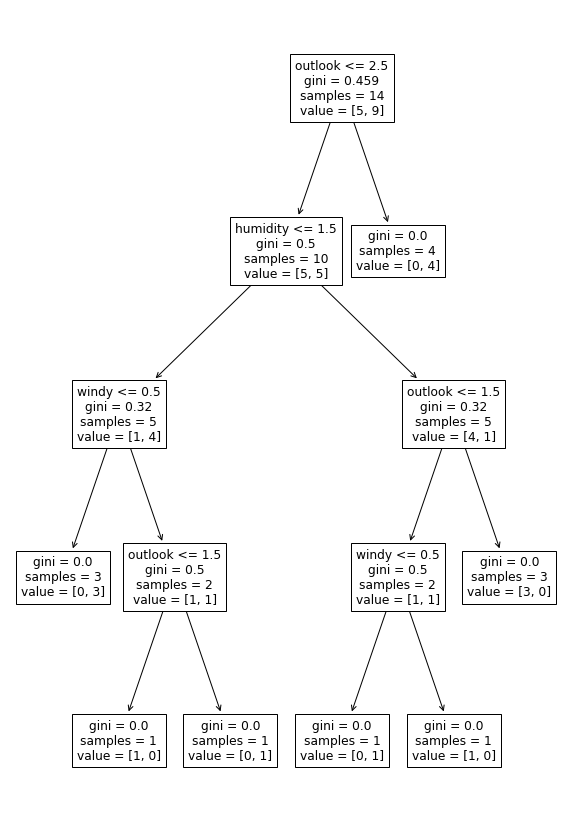

In [28]:
plt.figure(figsize=(10,15))
tree = plot_tree(dt_model,feature_names=x.columns)

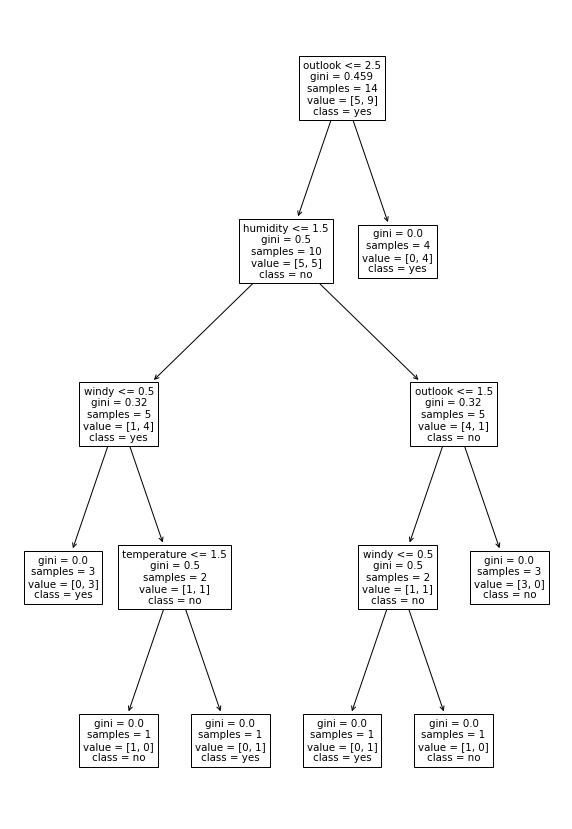

In [31]:
plt.figure(figsize=(10,15))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=['no','yes'])

In [29]:
dt_model = DecisionTreeClassifier(max_depth=3)
dt_model.fit(x,y)

DecisionTreeClassifier(max_depth=3)

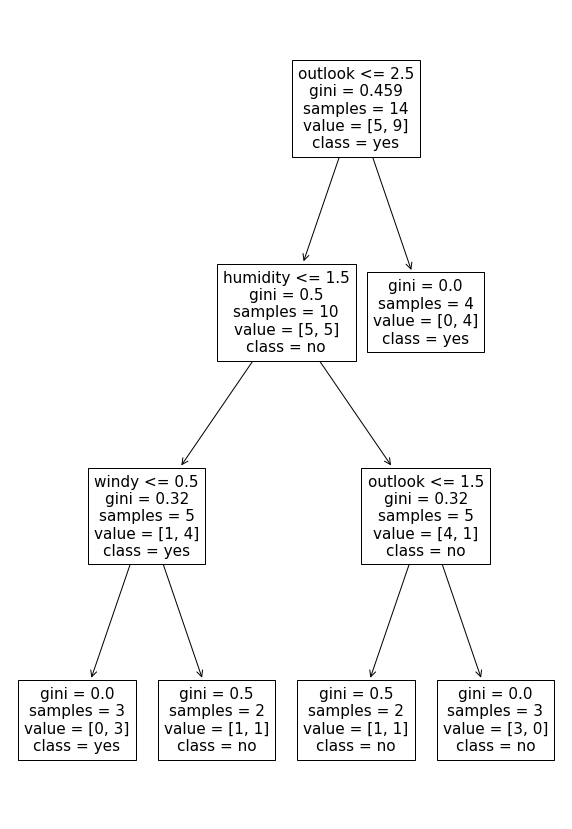

In [30]:
plt.figure(figsize=(10,15))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=['no','yes'])

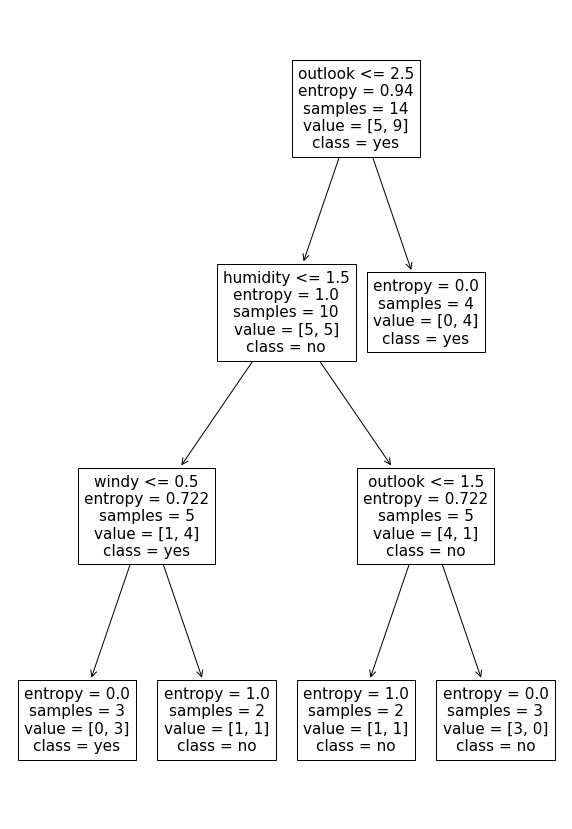

In [36]:
dt_model = DecisionTreeClassifier(max_depth=3,criterion='entropy')
dt_model.fit(x,y)
plt.figure(figsize=(10,15))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=['no','yes'])

In [ ]:

    Outlook Temp    humidity Windy 
4	rainy	mild	high	False	yes
5	rainy	cool	normal	False	yes
6	rainy	cool	normal	True	no
7	rainy	mild	normal	False	yes
8	rainy	mild	high	True	no
9	sunny	hot	high	False	no
10	sunny	hot	high	True	no
11	sunny	mild	high	False	no
12	sunny	cool	normal	False	yes
13	sunny	mild	normal	True	yes


gini_o = 0.5
gini_t = 0.5
gini_h = 0.5
gini_w = 0.5

root == lowest >> 

In [ ]:
### Min_sample_split >>minimum number of sample required to split 




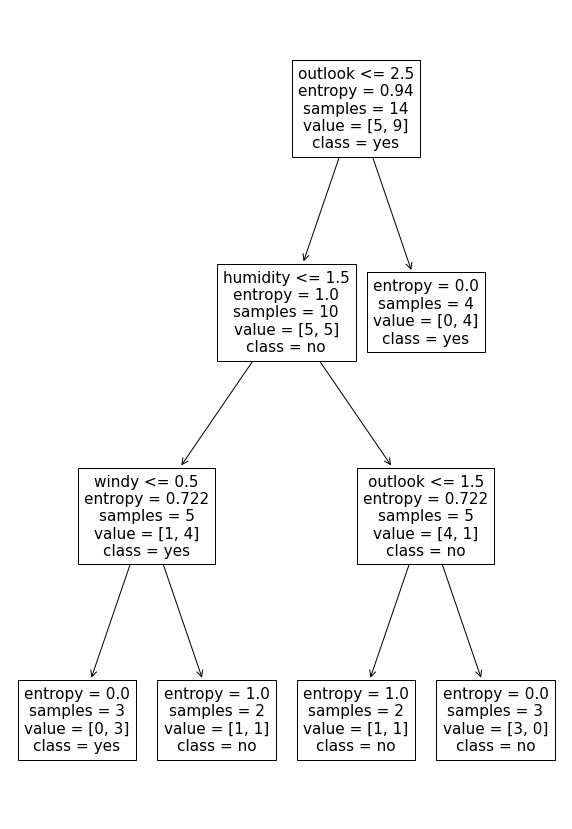

In [46]:
dt_model = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_split=5)
dt_model.fit(x,y)
plt.figure(figsize=(10,15))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=['no','yes'])

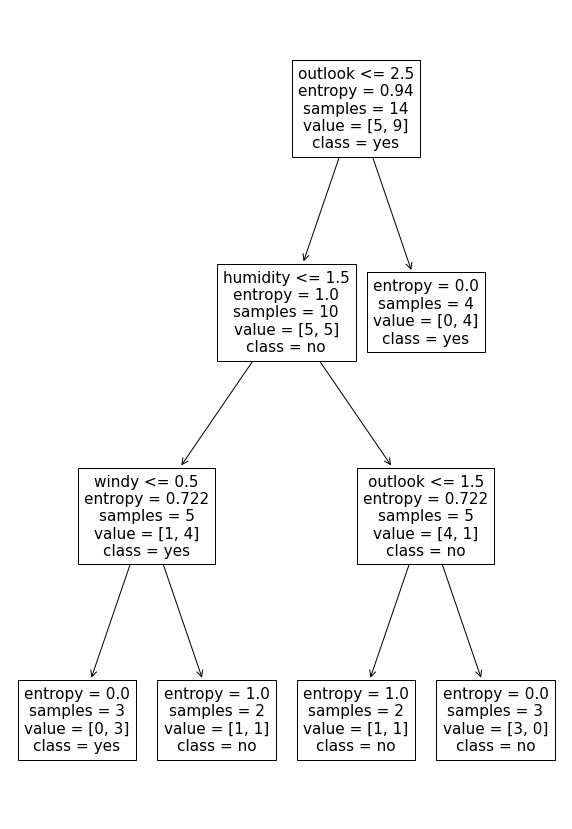

In [41]:
### min_sample_leaf

dt_model = DecisionTreeClassifier(max_depth=3,criterion='entropy')
dt_model.fit(x,y)
plt.figure(figsize=(10,15))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=['no','yes'])

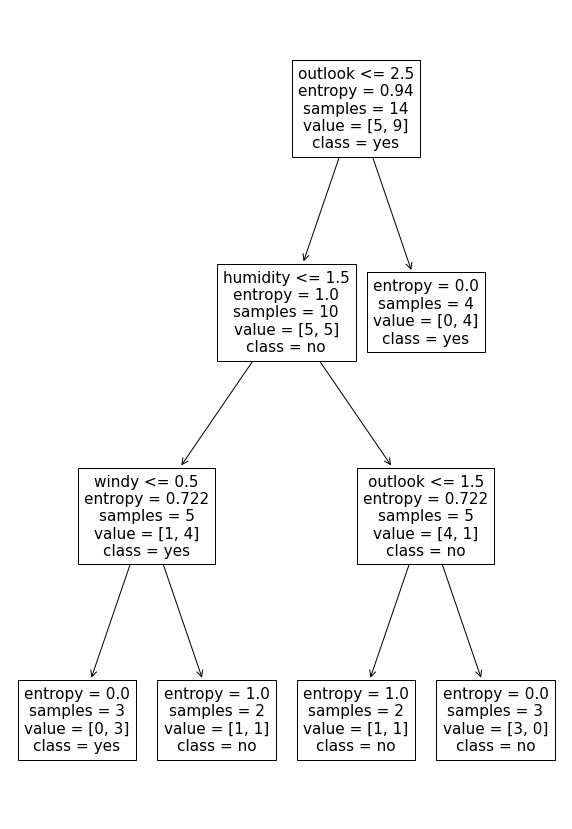

In [31]:
### min_sample_leaf >> minimum number of samples required to be at the leaft node

dt_model = DecisionTreeClassifier(max_depth=3,criterion='entropy',min_samples_leaf=2)
dt_model.fit(x,y)
plt.figure(figsize=(10,15))
tree = plot_tree(dt_model,feature_names=x.columns,class_names=['no','yes'])

In [32]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(dt_model,file)